<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53775 entries, 0 to 53774
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53775 non-null  float64
 1   cut      53775 non-null  object 
 2   color    53775 non-null  object 
 3   clarity  53775 non-null  object 
 4   depth    53775 non-null  float64
 5   table    53775 non-null  float64
 6   price    53775 non-null  int64  
 7   x        53775 non-null  float64
 8   y        53775 non-null  float64
 9   z        53775 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None
              carat         depth         table         price             x  \
count  53775.000000  53775.000000  53775.000000  53775.000000  53775.000000   
mean       0.797536     61.748232     57.457806   3931.220288      5.731579   
std        0.473169      1.429639      2.233257   3985.918716      1.118611   
min        0.200000     43.000000     43.000000    3

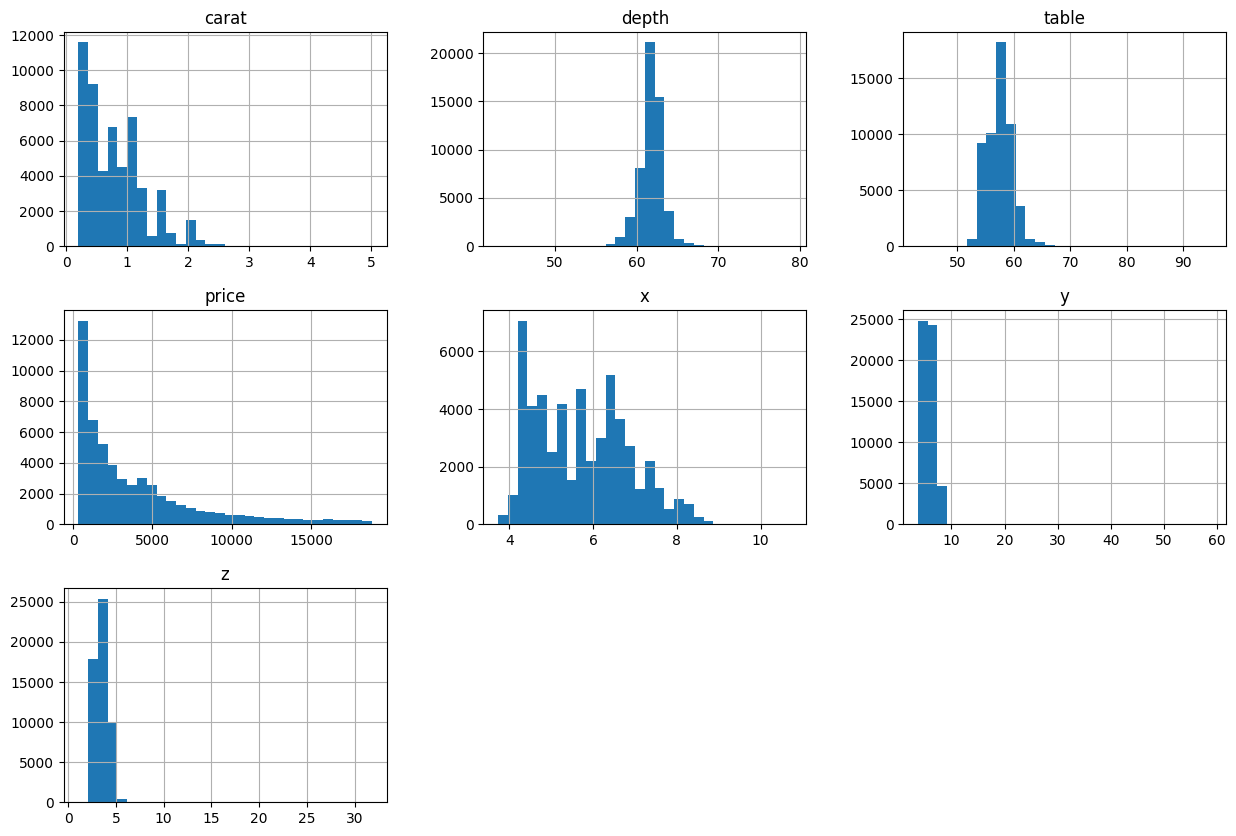

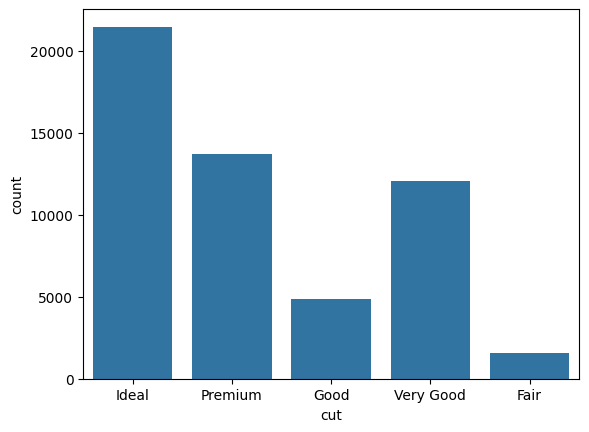

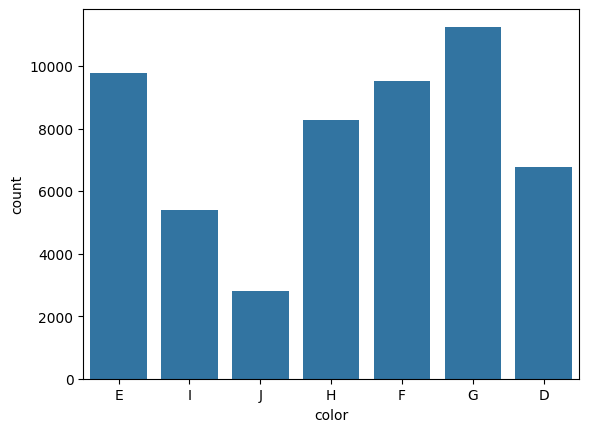

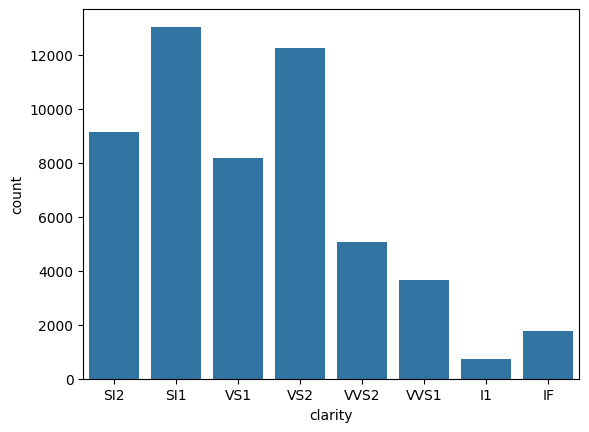

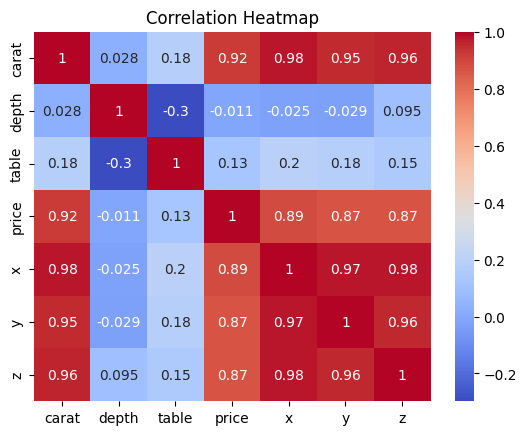

In [39]:
# Exploratory Data Analysis (EDA) for Diamonds Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
diamonds = pd.read_csv('diamonds.csv')

# Inspect the dataset
print(diamonds.info())
print(diamonds.describe())
print(diamonds.head())

# Check for missing values
print(diamonds.isnull().sum())

# Distribution of numerical features
numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
diamonds[numerical_features].hist(bins=30, figsize=(15, 10))
plt.show()

# Analyze categorical features
categorical_features = ['cut', 'color', 'clarity']
for feature in categorical_features:
    sns.countplot(data=diamonds, x=feature)
    plt.show()

# Correlation heatmap
# Select only numeric columns for correlation
numeric_columns = diamonds.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Randomly sample 12,500 records
diamonds_model = diamonds.sample(n=12500, random_state=42)

In [ ]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
# Preprocessing
categorical_features = ['cut', 'color', 'clarity']
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Split the data
X = diamonds_model.drop('price', axis=1)
y = diamonds_model['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

R²: 0.918892796840912
MAE: 737.3030322284667
RMSE: 1143.9979348968134


In [ ]:
# PCA-based Regression
from sklearn.decomposition import PCA
import numpy as np
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(diamonds_model[numerical_features])

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Linear Regression
pca_model = LinearRegression()
pca_model.fit(X_train, y_train)

# Evaluate the model
y_pred = pca_model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

R²: 0.7978063119422738
MAE: 1317.603435999921
RMSE: 1806.2560908539792


In [42]:
# Lasso and Ridge Regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

# Lasso Regression
lasso_model = Pipeline(steps=[
    ('regressor', Lasso(alpha=0.1))  # Lasso regression with alpha=0.1
])
lasso_model.fit(X_train, y_train)  # Fit the model
y_pred_lasso = lasso_model.predict(X_test)  # Predict on the test set
print("Lasso R²:", r2_score(y_test, y_pred_lasso))  # R² score for Lasso
print("Lasso MAE:", mean_absolute_error(y_test, y_pred_lasso))  # MAE for Lasso
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))  # RMSE for Lasso

# Ridge Regression
ridge_model = Pipeline(steps=[
    ('regressor', Ridge(alpha=1.0))  # Ridge regression with alpha=1.0
])
ridge_model.fit(X_train, y_train)  # Fit the model
y_pred_ridge = ridge_model.predict(X_test)  # Predict on the test set
print("Ridge R²:", r2_score(y_test, y_pred_ridge))  # R² score for Ridge
print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge))  # MAE for Ridge
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))  # RMSE for Ridge

Lasso R²: 0.7978066705924897
Lasso MAE: 1317.5910632359673
Lasso RMSE: 1806.2544888889765
Ridge R²: 0.7978063543795123
Ridge MAE: 1317.5825430274092
Ridge RMSE: 1806.25590130176


Analysis
The model with the highest R² and lowest MAE/RMSE is the best-performing model.
Regularization (Lasso/Ridge) may improve performance by reducing overfitting.
PCA-based models may underperform if the dimensionality reduction discards important information.